### Dataset loading and basic prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Job test/Rokomari/Food_Time_Data_Set_BIAnalysis.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  object 
 1   Delivery_person_ID           10000 non-null  object 
 2   Delivery_person_Age          10000 non-null  float64
 3   Delivery_person_Ratings      10000 non-null  float64
 4   Restaurant_latitude          10000 non-null  float64
 5   Restaurant_longitude         10000 non-null  float64
 6   Delivery_location_latitude   10000 non-null  float64
 7   Delivery_location_longitude  10000 non-null  float64
 8   Type_of_order                10000 non-null  object 
 9   Type_of_vehicle              10000 non-null  object 
 10  temperature                  9995 non-null   float64
 11  humidity                     9995 non-null   float64
 12  precipitation                9995 non-null   float64
 13  weather_descript

In [ ]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Unnamed: 14,Distance (km)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9995.000000,9995.000000,9995.000000,0.0,9080.000000
mean,29.522000,4.629370,16.893418,70.177749,17.412655,70.880072,22.936907,66.164882,0.016233,NaN,14.292747
std,5.700348,0.322941,8.330948,23.203352,7.336846,21.174585,3.379448,15.602939,0.074911,NaN,8.376254
min,15.000000,1.000000,-30.902872,-88.352885,0.010000,0.010000,6.770000,27.000000,0.000000,NaN,1.550000
25%,25.000000,4.500000,12.913041,73.170937,12.983959,73.753278,20.140000,54.000000,0.000000,NaN,7.620000
50%,29.000000,4.700000,18.546258,75.902847,18.626216,76.022574,23.000000,67.000000,0.000000,NaN,13.400000
75%,34.000000,4.800000,22.727021,78.047717,22.785089,78.128092,25.980000,81.000000,0.000000,NaN,19.610000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,29.050000,94.000000,1.460000,NaN,59.840000


### Data cleaning

In [ ]:
df['Unnamed: 14']

,Unnamed: 14
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9996,NaN
9997,NaN
9998,NaN
9999,NaN


Let's drop empty column

In [ ]:
columns_to_drop = ['Unnamed: 14']

df = df.drop(columns=columns_to_drop)

Now lets deep dive a little bit

In [ ]:
df.head(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.89,43.45
5,9BB4,HYDRES09DEL03,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,21.43,65.0,0.0,broken clouds,Moderate,11.30,30.6
6,95B4,RANCHIRES15DEL01,33.0,4.7,23.369746,85.339820,23.479746,85.449820,Meal,scooter,17.51,69.0,0.0,clear sky,High,19.11,38.16666667
7,9EB2,MYSRES15DEL02,35.0,4.6,12.352058,76.606650,12.482058,76.736650,Meal,motorcycle,18.03,82.0,0.0,scattered clouds,Very High,28.41,50
8,1102,HYDRES05DEL02,22.0,4.8,17.433809,78.386744,17.563809,78.516744,Buffet,motorcycle,21.08,65.0,0.0,broken clouds,Very High,31.62,81.78333333
9,CDCD,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Snack,motorcycle,12.44,77.0,0.0,clear sky,High,11.59,36.36666667


In [ ]:
df.tail(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
9951,C3B0,ALHRES15DEL03,29.0,4.9,25.449872,81.836167,25.479872,81.866167,Snack,motorcycle,25.21,44.0,0.00,clear sky,Low,6.11,21.86666667
9952,7EE5,INDORES13DEL02,36.0,4.8,22.745049,75.892471,22.795049,75.942471,Buffet,motorcycle,22.14,60.0,0.00,haze,Moderate,11.78,31.1
9953,4FC9,PUNERES01DEL02,37.0,4.4,18.569156,73.774723,18.649156,73.854723,Meal,scooter,22.25,51.0,0.00,clear sky,High,19.17,42.75
9954,39C5,INDORES20DEL02,35.0,4.7,22.732225,75.874765,22.812225,75.954765,Buffet,scooter,22.18,60.0,0.00,haze,High,17.09,41.66666667
9955,5CB4,HYDRES010DEL03,23.0,5.0,17.428294,78.404423,17.488294,78.464423,Drinks,scooter,22.88,60.0,0.00,haze,High,16.60,53.73333333
9956,1D4A,SURRES15DEL02,22.0,4.2,21.160522,72.771477,21.210522,72.821477,Meal,motorcycle,24.95,73.0,0.00,mist,Moderate,9.49,24.93333333
9957,F44,MUMRES07DEL01,30.0,4.9,19.091458,72.827808,19.161458,72.897808,Drinks,motorcycle,27.26,57.0,0.00,smoke,Very High,18.18,67.56666667
9958,6806,INDORES03DEL03,32.0,4.7,22.751857,75.866699,22.811857,75.926699,Snack,scooter,22.19,60.0,0.00,haze,Moderate,11.53,32.2
9959,8B6B,VADRES05DEL03,20.0,4.1,22.310526,73.170937,22.400526,73.260937,Buffet,motorcycle,23.95,64.0,0.00,haze,Moderate,18.18,32.83333333
9960,D1F1,AURGRES20DEL01,21.0,4.9,0.000000,0.000000,0.110000,0.110000,Snack,electric_scooter,26.41,82.0,0.25,light rain,NaN,NaN,NaN


last row is empty lets avoid it

In [ ]:
df = df.iloc[:10000]

In [ ]:
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
9995,4347,MUMRES07DEL01,25.0,4.0,19.091458,72.827808,19.101458,72.837808,Meal,motorcycle,28.03,57.0,0.0,smoke,Low,3.78,18.2
9996,11B4,VADRES13DEL03,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,0.0,haze,High,18.92,32.61666667
9997,8336,HYDRES20DEL01,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,0.0,haze,Low,2.64,12.01666667
9998,338B,JAPRES18DEL03,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,0.0,clear sky,Very High,28.80,51.06666667
9999,3FB2,MUMRES11DEL03,29.0,4.7,18.994237,72.825553,19.084237,72.915553,Meal,scooter,28.01,57.0,0.0,smoke,High,17.63,43.8


We see Restaurant_latitude, Restaurant_longitude, Traffic_Level, Distance (km), and TARGET data need to be cleaned

In [ ]:
df_cleaned = df[
                (df["Restaurant_latitude"] != 0) &
                (df["Restaurant_longitude"] != 0) &
                (df["Traffic_Level"] != "N/A") &
                (df["Distance (km)"] != "N/A") &
                (~df["TARGET"].isin(["#VALUE!", "#N/A"]))]

df = df_cleaned.reset_index(drop=True)
df.head(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.89,43.45
5,9BB4,HYDRES09DEL03,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,21.43,65.0,0.0,broken clouds,Moderate,11.30,30.6
6,95B4,RANCHIRES15DEL01,33.0,4.7,23.369746,85.339820,23.479746,85.449820,Meal,scooter,17.51,69.0,0.0,clear sky,High,19.11,38.16666667
7,9EB2,MYSRES15DEL02,35.0,4.6,12.352058,76.606650,12.482058,76.736650,Meal,motorcycle,18.03,82.0,0.0,scattered clouds,Very High,28.41,50
8,1102,HYDRES05DEL02,22.0,4.8,17.433809,78.386744,17.563809,78.516744,Buffet,motorcycle,21.08,65.0,0.0,broken clouds,Very High,31.62,81.78333333
9,CDCD,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Snack,motorcycle,12.44,77.0,0.0,clear sky,High,11.59,36.36666667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9087 non-null   object 
 1   Delivery_person_ID           9087 non-null   object 
 2   Delivery_person_Age          9087 non-null   float64
 3   Delivery_person_Ratings      9087 non-null   float64
 4   Restaurant_latitude          9087 non-null   float64
 5   Restaurant_longitude         9087 non-null   float64
 6   Delivery_location_latitude   9087 non-null   float64
 7   Delivery_location_longitude  9087 non-null   float64
 8   Type_of_order                9087 non-null   object 
 9   Type_of_vehicle              9087 non-null   object 
 10  temperature                  9082 non-null   float64
 11  humidity                     9082 non-null   float64
 12  precipitation                9082 non-null   float64
 13  weather_descriptio

In [ ]:
df.columns.tolist()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Type_of_order',
 'Type_of_vehicle',
 'temperature',
 'humidity',
 'precipitation',
 'weather_description',
 'Traffic_Level',
 'Distance (km)',
 'TARGET']

Now we will handle missing values (NaN)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

ID                              0
Delivery_person_ID              0
Delivery_person_Age             0
Delivery_person_Ratings         0
Restaurant_latitude             0
Restaurant_longitude            0
Delivery_location_latitude      0
Delivery_location_longitude     0
Type_of_order                   0
Type_of_vehicle                 0
temperature                     5
humidity                        5
precipitation                   5
weather_description             5
Traffic_Level                   2
Distance (km)                   7
TARGET                         47
dtype: int64


In [ ]:
df = df.apply(pd.to_numeric, errors='ignore') # Converting columns to float
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)  # Mean method is used here

<ipython-input-16-14bf3ea5dd6f>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore') # Converting columns to float


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
temperature                    0
humidity                       0
precipitation                  0
weather_description            5
Traffic_Level                  2
Distance (km)                  0
TARGET                         0
dtype: int64


Alhamdulillah! almost all features are missing value free

Let's check those 2 features which are not

In [ ]:
df.groupby('Traffic_Level').size()

,0
Traffic_Level,
High,2736
Low,1726
Moderate,2219
Very High,1772
Very Low,632


In [ ]:
df.groupby('weather_description').size()

,0
weather_description,
broken clouds,532
clear sky,3211
few clouds,40
fog,49
haze,2378
light rain,42
mist,1740
moderate rain,1
overcast clouds,182


Those aren't fact for now

### Data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9087 non-null   object 
 1   Delivery_person_ID           9087 non-null   object 
 2   Delivery_person_Age          9087 non-null   float64
 3   Delivery_person_Ratings      9087 non-null   float64
 4   Restaurant_latitude          9087 non-null   float64
 5   Restaurant_longitude         9087 non-null   float64
 6   Delivery_location_latitude   9087 non-null   float64
 7   Delivery_location_longitude  9087 non-null   float64
 8   Type_of_order                9087 non-null   object 
 9   Type_of_vehicle              9087 non-null   object 
 10  temperature                  9087 non-null   float64
 11  humidity                     9087 non-null   float64
 12  precipitation                9087 non-null   float64
 13  weather_descriptio

Lets check distribution of numerical features

array([[<Axes: title={'center': 'Delivery_person_Age'}>,
        <Axes: title={'center': 'Delivery_person_Ratings'}>,
        <Axes: title={'center': 'Restaurant_latitude'}>],
       [<Axes: title={'center': 'Restaurant_longitude'}>,
        <Axes: title={'center': 'Delivery_location_latitude'}>,
        <Axes: title={'center': 'Delivery_location_longitude'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'precipitation'}>],
       [<Axes: title={'center': 'Distance (km)'}>,
        <Axes: title={'center': 'TARGET'}>, <Axes: >]], dtype=object)

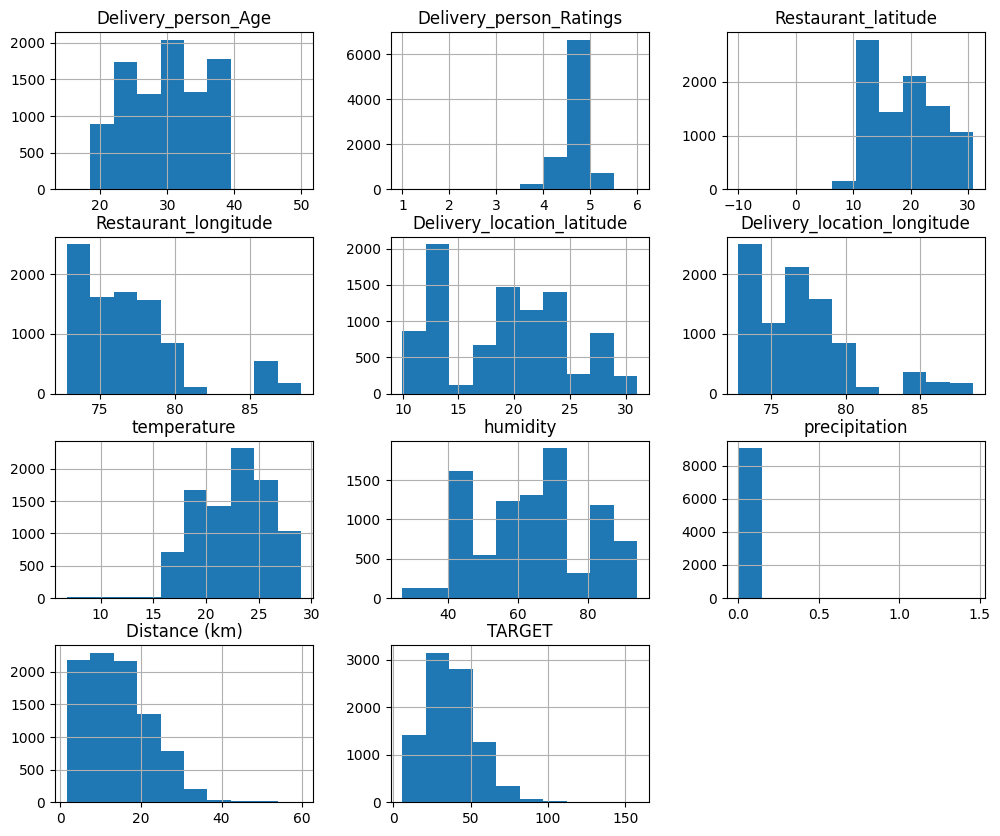

In [ ]:
df.hist(figsize=(12,10))

Now unique values of all features

In [ ]:
df.nunique()

,0
ID,9084
Delivery_person_ID,1135
Delivery_person_Age,22
Delivery_person_Ratings,28
Restaurant_latitude,389
Restaurant_longitude,388
Delivery_location_latitude,3394
Delivery_location_longitude,3394
Type_of_order,4
Type_of_vehicle,4


### Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

As we have mixed numerical and categorical data, so lets build heatmap with numerical features only

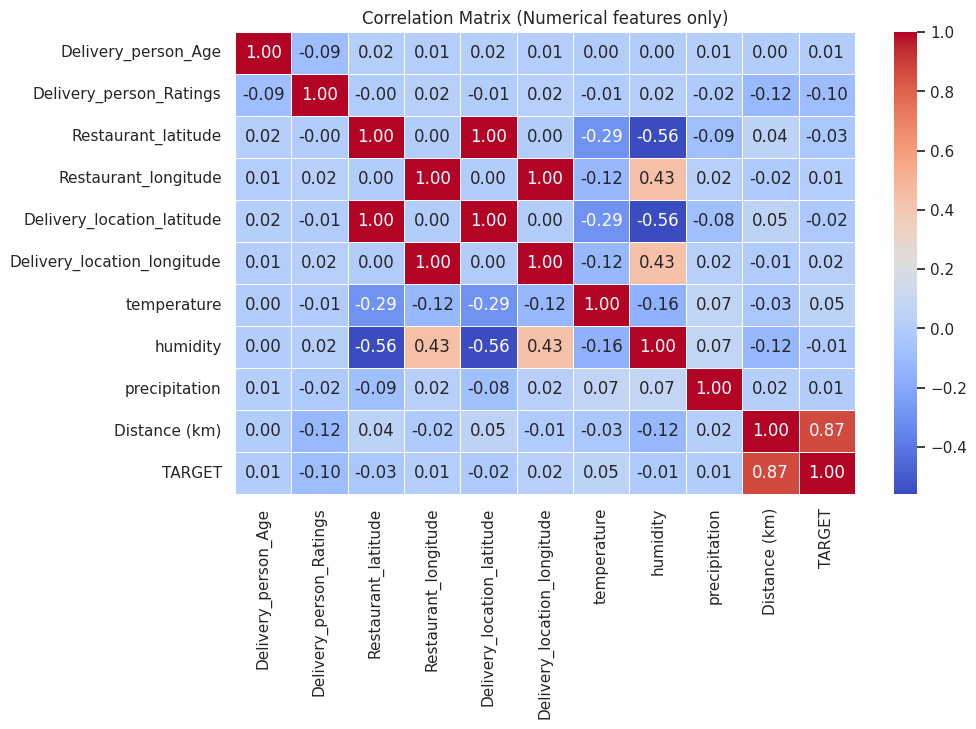

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numerical features only)")
plt.show()

Pairplot of correlated features

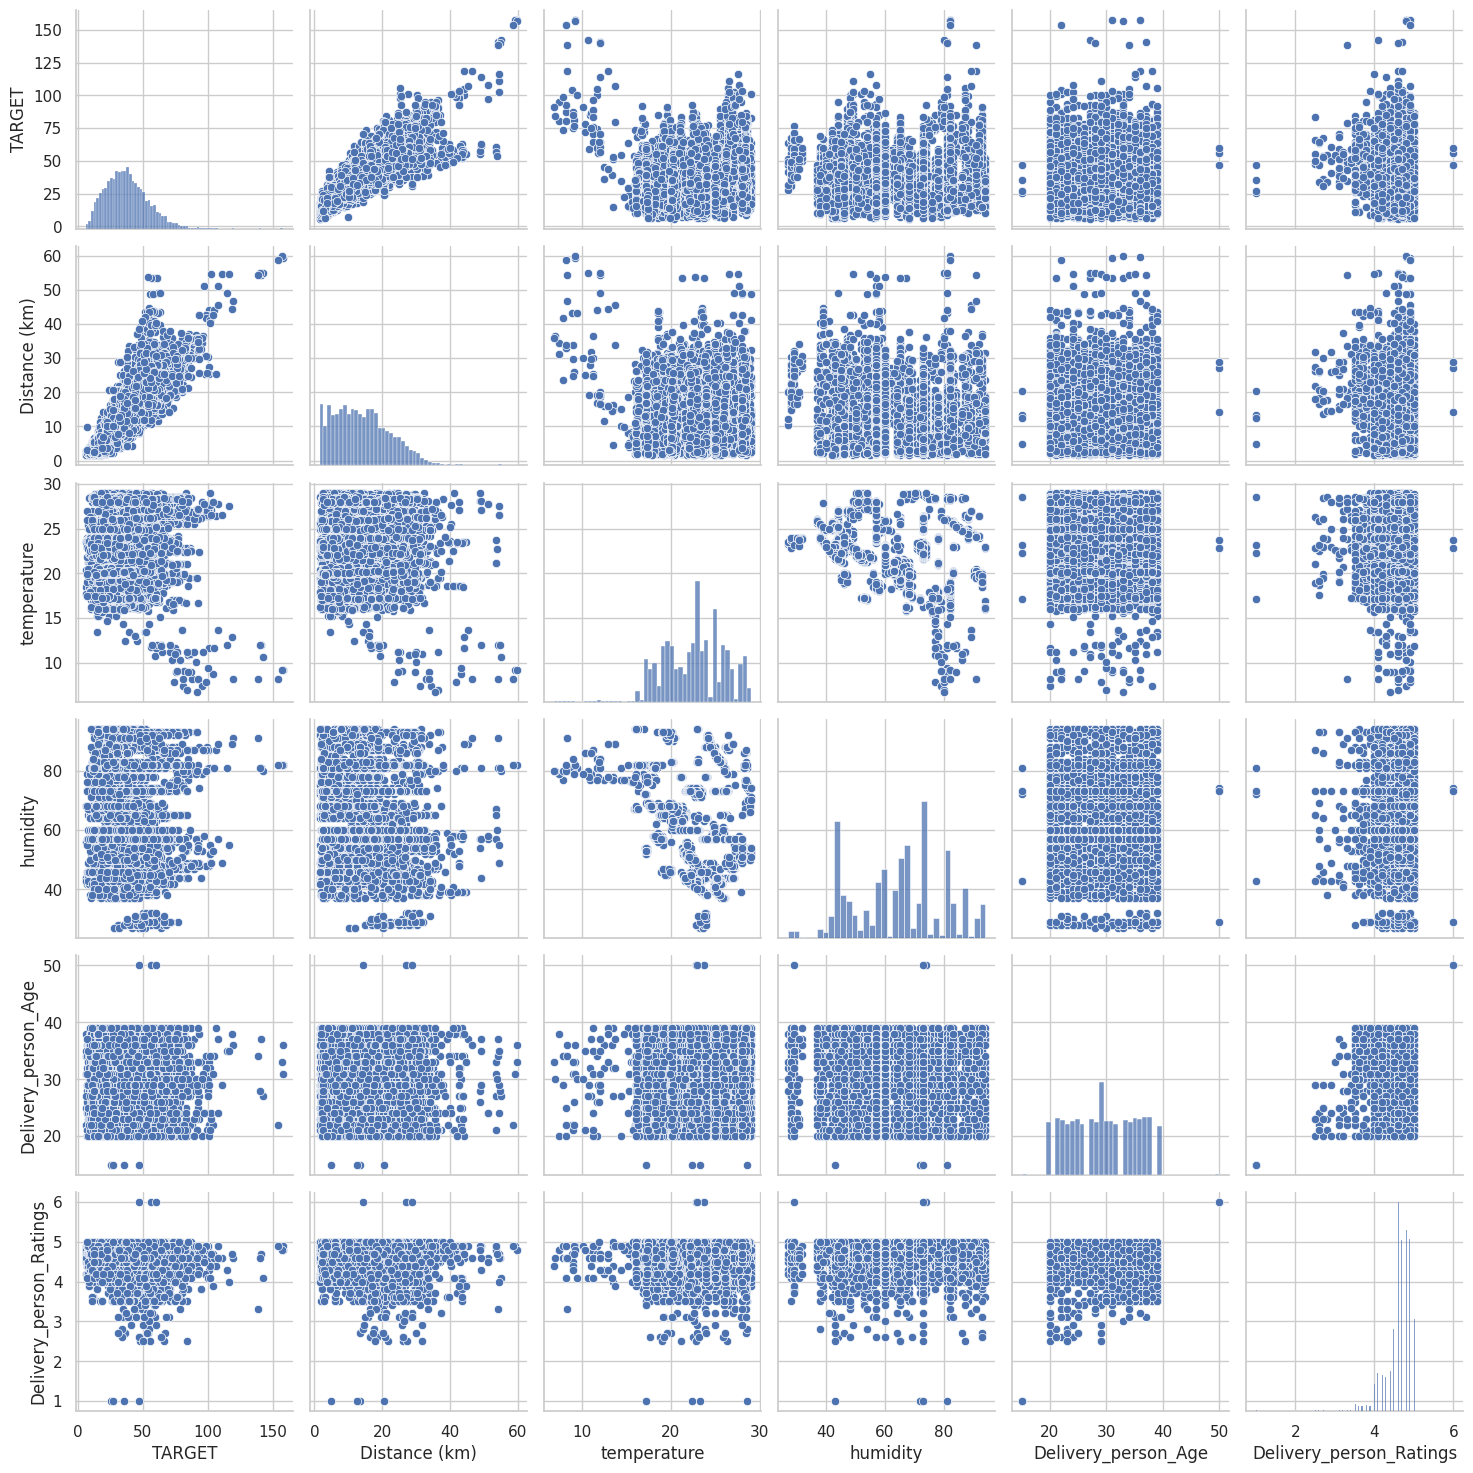

In [ ]:
sns.pairplot(df[["TARGET", "Distance (km)", "temperature", "humidity", "Delivery_person_Age", "Delivery_person_Ratings"]])
plt.show()

Lets create histograms & boxplots for TARGET, Distance (km), and temperature features

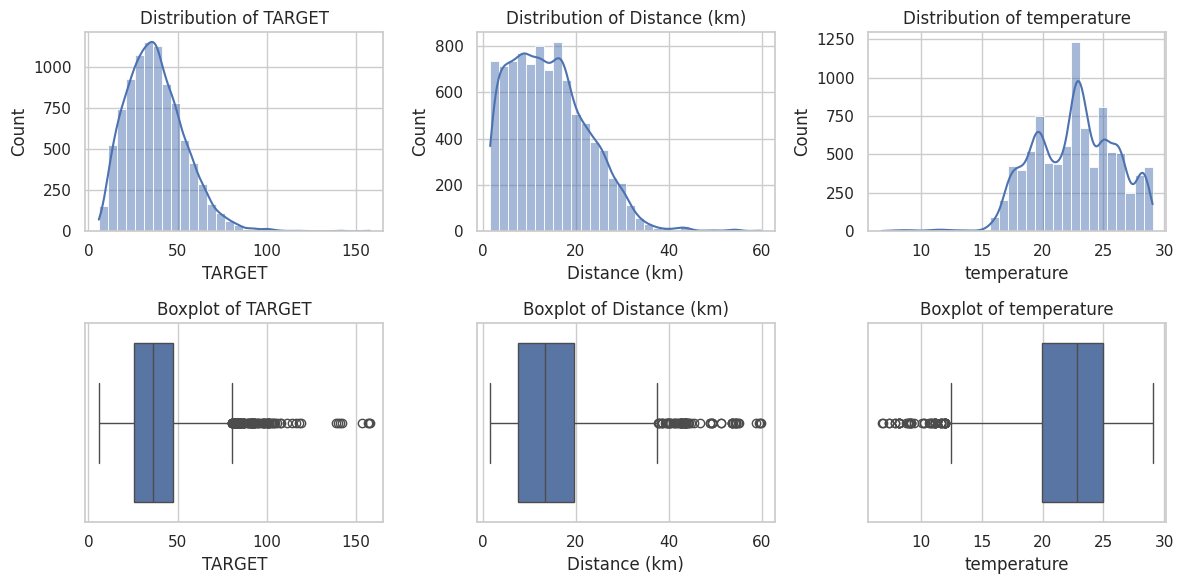

In [ ]:
features = ["TARGET", "Distance (km)", "temperature"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(features):
    plt.subplot(2, len(features), i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.subplot(2, len(features), i + 1 + len(features))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

Scatterplot of Distance (km) vs. TARGET & Temperature vs. TARGET

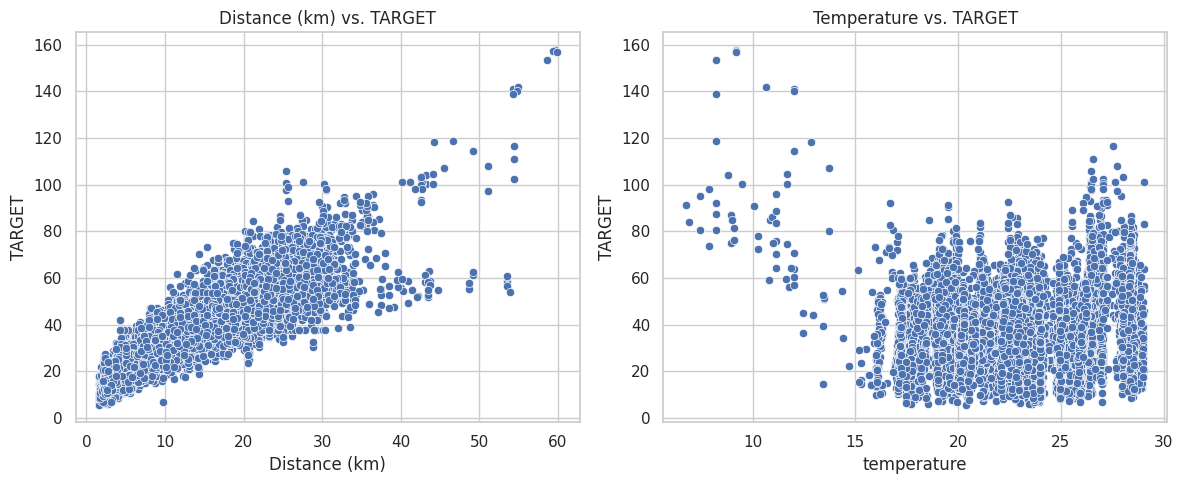

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df["Distance (km)"], y=df["TARGET"])
plt.title("Distance (km) vs. TARGET")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df["temperature"], y=df["TARGET"])
plt.title("Temperature vs. TARGET")

plt.tight_layout()
plt.show()

Now lets explore some categorical features

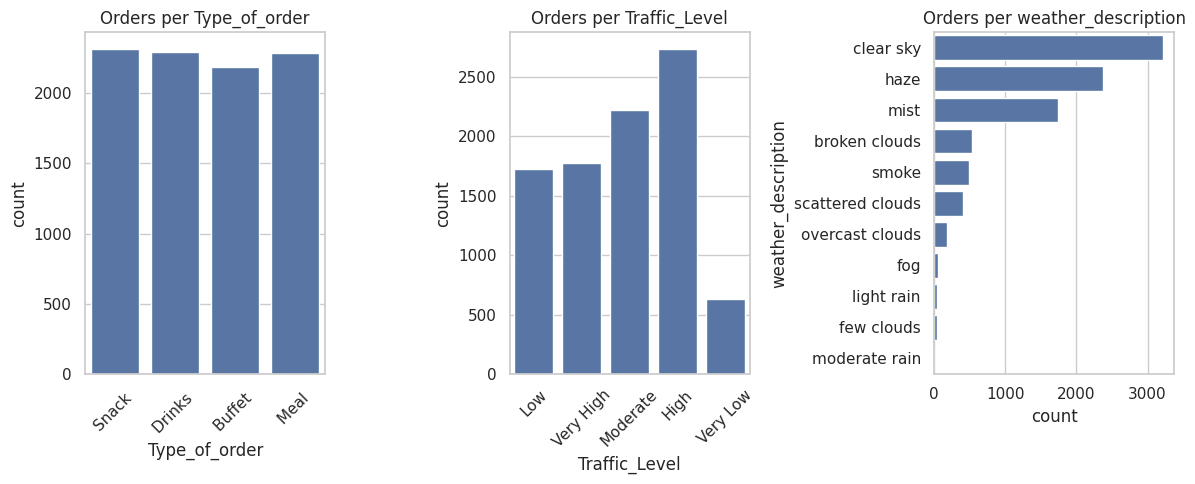

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=df["Type_of_order"])
plt.xticks(rotation=45)
plt.title("Orders per Type_of_order")

plt.subplot(1, 3, 2)
sns.countplot(x=df["Traffic_Level"])
plt.xticks(rotation=45)
plt.title("Orders per Traffic_Level")

plt.subplot(1, 3, 3)
sns.countplot(y=df["weather_description"], order=df["weather_description"].value_counts().index)
plt.title("Orders per weather_description")

plt.tight_layout()
plt.show()

### Getting insight

I observed and thought this questions. By answering this questions we will get a good insights of the dataset

* What are the most common Type_of_order and Type_of_vehicle?

* How does Traffic_Level affect TARGET (delivery time)?

* Can we see a correlation between Distance (km) and TARGET?

* Does weather (weather_description) have on impact delivery times?

* Is there any influence of Delivery_person_Age or Delivery_person_Ratings on TARGET?


<ipython-input-32-3ffb8ba70c20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Type_of_order"], order=df["Type_of_order"].value_counts().index, palette="viridis")
<ipython-input-32-3ffb8ba70c20>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Type_of_vehicle"], order=df["Type_of_vehicle"].value_counts().index, palette="viridis")


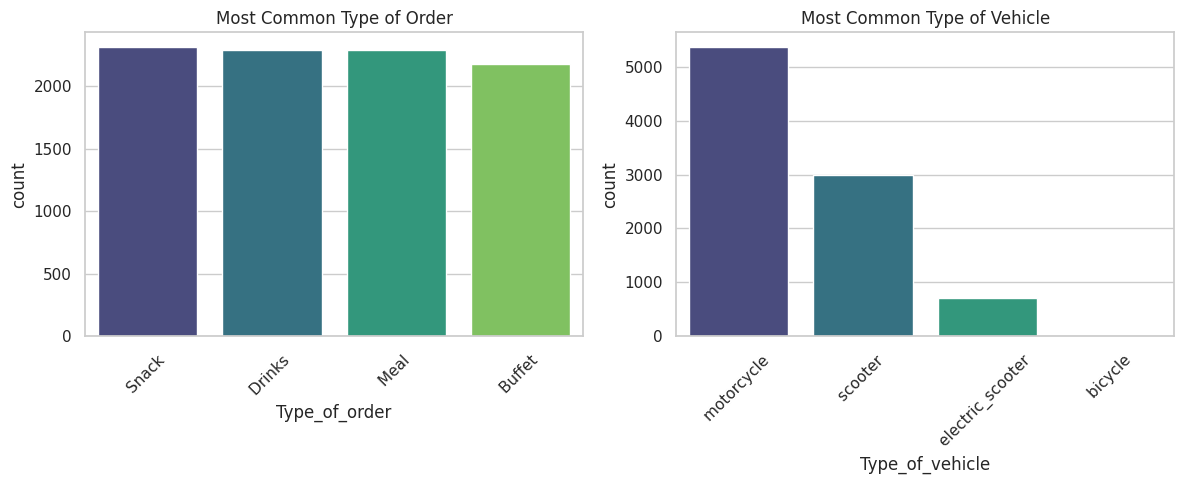

In [ ]:
# What are the most common Type_of_order and Type_of_vehicle?
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=df["Type_of_order"], order=df["Type_of_order"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Most Common Type of Order")

plt.subplot(1, 2, 2)
sns.countplot(x=df["Type_of_vehicle"], order=df["Type_of_vehicle"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)

plt.title("Most Common Type of Vehicle")
plt.tight_layout()
plt.show()

<ipython-input-33-486c8795fee5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Traffic_Level"], y=df["TARGET"], palette="coolwarm")


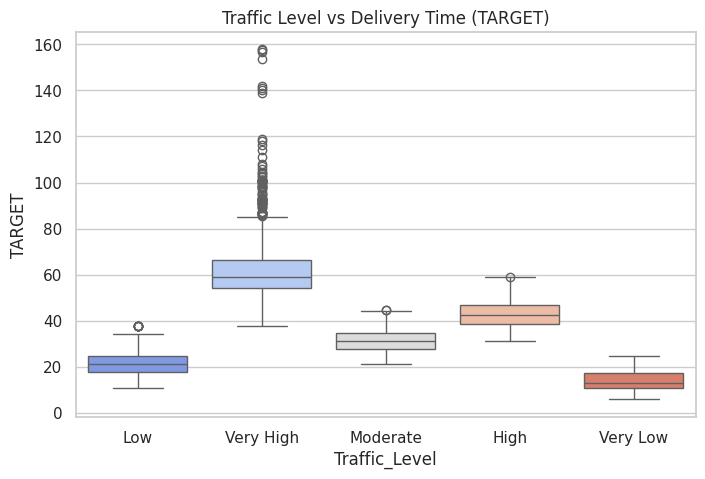

In [ ]:
# How does Traffic_Level affect TARGET (delivery time)?
plt.figure(figsize=(8, 5))

sns.boxplot(x=df["Traffic_Level"], y=df["TARGET"], palette="coolwarm")
plt.title("Traffic Level vs Delivery Time (TARGET)")
plt.show()

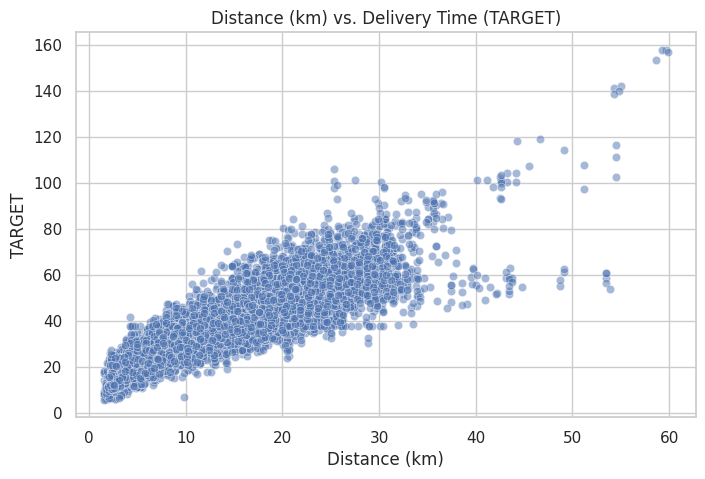

Correlation between Distance (km) and TARGET: 0.87


In [ ]:
# Can we see a correlation between Distance (km) and TARGET?
plt.figure(figsize=(8, 5))

sns.scatterplot(x=df["Distance (km)"], y=df["TARGET"], alpha=0.5)
plt.title("Distance (km) vs. Delivery Time (TARGET)")
plt.show()

correlation = df["Distance (km)"].corr(df["TARGET"])
print(f"Correlation between Distance (km) and TARGET: {correlation:.2f}")

<ipython-input-35-98199a10194a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["weather_description"], y=df["TARGET"], palette="magma")


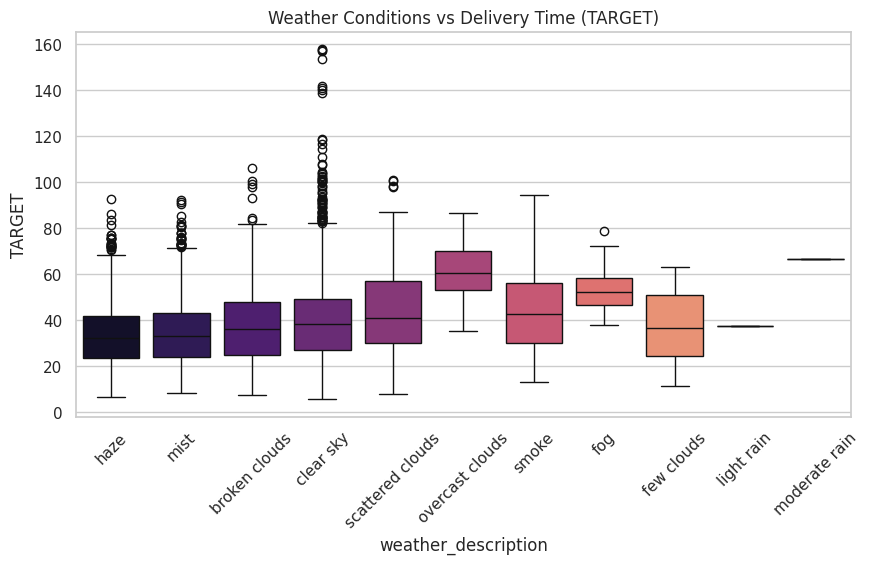

In [ ]:
# Does weather (weather_description) have on impact delivery times?
plt.figure(figsize=(10, 5))

sns.boxplot(x=df["weather_description"], y=df["TARGET"], palette="magma")
plt.xticks(rotation=45)

plt.title("Weather Conditions vs Delivery Time (TARGET)")
plt.show()

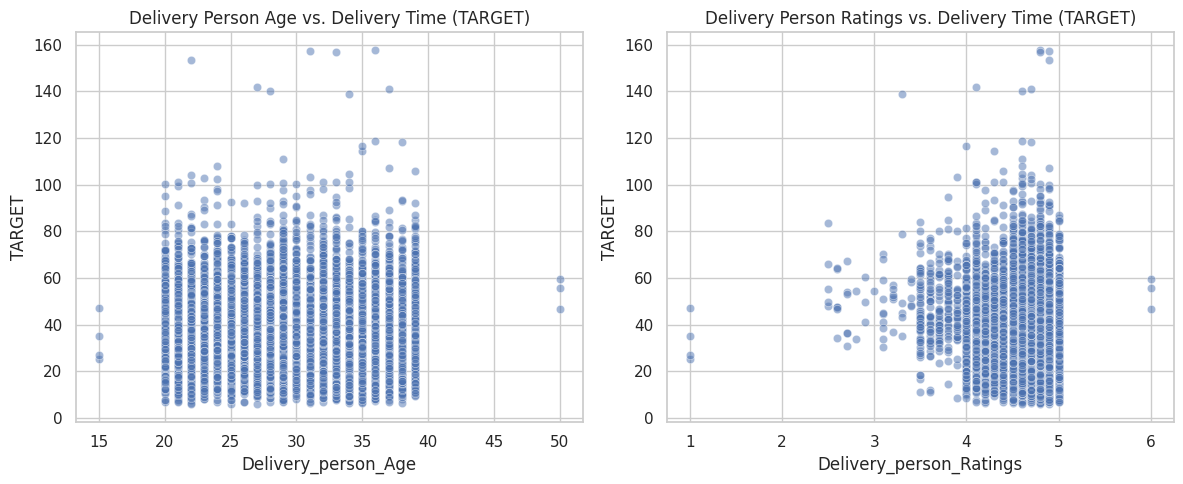

In [ ]:
# Is there any influence of Delivery_person_Age or Delivery_person_Ratings on TARGET?
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df["Delivery_person_Age"], y=df["TARGET"], alpha=0.5)
plt.title("Delivery Person Age vs. Delivery Time (TARGET)")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df["Delivery_person_Ratings"], y=df["TARGET"], alpha=0.5)
plt.title("Delivery Person Ratings vs. Delivery Time (TARGET)")

plt.tight_layout()
plt.show()

Now we have reached at the end of this analysis, the insights of the above plots will be described at the report file

### Jazāk Allāh khayran